# Food Claim Exploratory Data Analysis on Python

![Food_claim.](Food_claim..jpg)


# Table of Contents:
- Business Background
- Business Problem
- Business Questions
- Step-by-step data cleaning and Data Validation process
- EDA
- Solutions
- Recommendation
- Business Background

Vivendo is a fast food chain in Brazil with over 200 outlets. Customers often claim compensation from the company for food poisoning. The legal team processes these claims. The legal team has offices in four locations. The legal team wants to improve how long it takes to reply to customers and close claims. The head of the legal department wants a report on how each location differs in the time it takes to close claims.

## Business Problem:
The legal department is dealing with:
- Inefficient customer response times.
- Unanalyzed geographical differences in claim processing time.
- Inadequate insights into claim closure duration

## Business Questions:
- How many customers are there in each location?
- Is there any relationship between Locations and the time it takes to close claims?
- How does the time to close claims looks like?

# Tasks 1

For every column in the data:
- State whether the values match the description given in the table above.
- State the number of missing values in the column.
- Describe what you did to make values match the description if they did not match.



**Solution:**

Note: The amount column currency is the Brazilian Real (BRL).

**Claim ID**: There were 2000 unique values that match the description given. There are no missing values. No changes were made to this column.

**Time to close**: The values of this column range from 76 to 518. There were no missing values. No changes were made to this column.

**Claim amount**: The values of this column were all rounded to 2 decimal places, and the values ranges from 1637.94 to 76106.80. There were no missing values, rather 'R$' Brazilian currency logo was removed, and the data type converted to float. 

**Amount paid:** The values of this column were all rounded to 2 decimal places ranged from 1516.72 to 52498.75, which is consistent with the description given. 36 values were missing. The missing values were replaced with the median value of the remaining data, which was 20105.69.

**Location**: This column had four unique categories,'RECIFE', 'FORTALEZA', 'SAO LUIS', 'NATAL', that match those in the description. There were no missing values, and were also capitalized and used the string title method for the column.


**Individual on claim**: The values of this column range from 1 to 15, and match those in the description. There were no missing values and no changes were made to this column.

**Linked cases**: The values in this column were either True, False or missing. There were 26 missing values. All missing values were replaced with FALSE.

**Cause**: This column had three unique categories, 'meat','unknown', and 'vegetable', that match those in the description. But had twe additional categories that doesn't match the description, ' Meat' and 'VEGETABLES', both were renamed to match the description, and also capitalized the column. 


The dataset had 2000 rows and 8 columns before cleaning, and after cleaning and validation the dataset remains 2000 rows and 8 columns.

# Task 2

Create a visualization that shows the number of claims in each location. Use the visualization to:
- State which category of the variable location has the most observations
- Explain whether the observations are balanced across categories of the variable location

# Task 3


Describe the distribution of time to close for all claims. Your answer must include a visualization that shows the distribution.

In [1]:
# import all the the required library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib.style as style
style.use('ggplot')
plt.figure(figsize=(10,6))
sns.set_palette(['gray'])

<Figure size 1000x600 with 0 Axes>

In [3]:
# Load the dataset
df = pd.read_csv('food_claims.csv')


In [4]:
# data head
df.head()

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,R$ 74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,R$ 52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,R$ 24447.2,23986.30,SAO LUIS,10,True,meat
3,4,186,R$ 29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,R$ 19520.6,16251.06,RECIFE,11,False,vegetable


In [5]:
# Check all info and descrption
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   object 
 3   amount_paid           1964 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          1974 non-null   object 
 7   cause                 2000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 125.1+ KB


In [6]:
# Check all info and descrption
df.describe()

,claim_id,time_to_close,amount_paid,individuals_on_claim
count,2000.000000,2000.00000,1964.000000,2000.000000
mean,1000.500000,185.56800,21541.975183,8.049500
std,577.494589,49.16339,12530.156509,4.087347
min,1.000000,76.00000,1516.720000,1.000000
25%,500.750000,158.00000,10995.950000,4.000000
50%,1000.500000,179.00000,20105.700000,8.000000
75%,1500.250000,204.00000,30709.350000,12.000000
max,2000.000000,518.00000,52498.750000,15.000000


<AxesSubplot: >

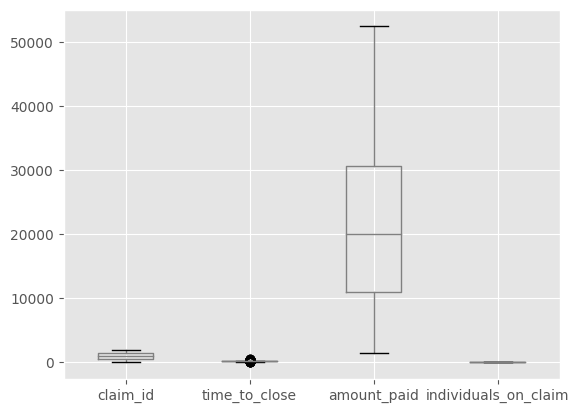

In [7]:
df.boxplot()

In [8]:
# Check for null values in the dataset
null_counts = df.isnull().sum()

print(null_counts)

claim_id                 0
time_to_close            0
claim_amount             0
amount_paid             36
location                 0
individuals_on_claim     0
linked_cases            26
cause                    0
dtype: int64


## Data Cleaning and Validation:

Data Validation: Let's start cleaning and validating all the fields one by one.

In [9]:
# 1. Claim_ID

# checking if there's any duplicates
has_duplicates = df['claim_id'].duplicated().any()
print(has_duplicates)

# # checking for numebr of duplicates
df['claim_id'].duplicated().sum() 

# checking for number of unique ID
len(df['claim_id'].unique()) 

False


2000

In [10]:
# 2. Time_to_close

df['time_to_close'].info()

# checking Missing values
df['time_to_close'].isnull().sum()
df['time_to_close'].describe()

<class 'pandas.core.series.Series'>
RangeIndex: 2000 entries, 0 to 1999
Series name: time_to_close
Non-Null Count  Dtype
--------------  -----
2000 non-null   int64
dtypes: int64(1)
memory usage: 15.8 KB


count    2000.00000
mean      185.56800
std        49.16339
min        76.00000
25%       158.00000
50%       179.00000
75%       204.00000
max       518.00000
Name: time_to_close, dtype: float64

In [11]:
check = df['time_to_close'] >= 400
filtered_data = df[check]

# Print the filtered data
print(filtered_data)

      claim_id  time_to_close  ... linked_cases    cause
377        378            499  ...        False  unknown
469        470            453  ...        False  unknown
546        547            419  ...        False  unknown
782        783            406  ...        False     meat
826        827            518  ...        False  unknown
1341      1342            427  ...        False  unknown

[6 rows x 8 columns]


In [12]:
df.head()

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,R$ 74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,R$ 52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,R$ 24447.2,23986.30,SAO LUIS,10,True,meat
3,4,186,R$ 29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,R$ 19520.6,16251.06,RECIFE,11,False,vegetable


In [13]:
# 3. Claim_amount


#Removing R$ from 'claim_amount'
df['claim_amount'] = df['claim_amount'].str.replace('R\$ ', '')

#Convert the claim_amount to a float data type
df['claim_amount'] = df['claim_amount'].astype(float)

In [14]:
#view claim_amount description
df['claim_amount'].describe()

count     2000.000000
mean     27156.965235
std      16195.783099
min       1637.940000
25%      13758.952500
50%      24821.085000
75%      38581.350000
max      76106.800000
Name: claim_amount, dtype: float64

In [15]:
# check the data info
df['claim_amount'].info

<bound method Series.info of 0       74474.55
1       52137.83
2       24447.20
3       29006.28
4       19520.60
          ...   
1995    28982.30
1996     5188.44
1997    11975.85
1998    23516.28
1999     8051.40
Name: claim_amount, Length: 2000, dtype: float64>

In [16]:
#4. Amount_paid

#view claim_amount description
df['amount_paid'].describe()

count     1964.000000
mean     21541.975183
std      12530.156509
min       1516.720000
25%      10995.950000
50%      20105.700000
75%      30709.350000
max      52498.750000
Name: amount_paid, dtype: float64

In [17]:
# check the data info
df['amount_paid'].info

<bound method Series.info of 0       51231.37
1       42111.30
2       23986.30
3       27942.72
4       16251.06
          ...   
1995    24265.02
1996     4772.77
1997    10087.81
1998    23310.24
1999     6417.92
Name: amount_paid, Length: 2000, dtype: float64>

In [18]:
# check amount equal to 0
count_am = (df['amount_paid'] == 0).sum()
print(count_am)

0


In [19]:
df.describe()

,claim_id,time_to_close,claim_amount,amount_paid,individuals_on_claim
count,2000.000000,2000.00000,2000.000000,1964.000000,2000.000000
mean,1000.500000,185.56800,27156.965235,21541.975183,8.049500
std,577.494589,49.16339,16195.783099,12530.156509,4.087347
min,1.000000,76.00000,1637.940000,1516.720000,1.000000
25%,500.750000,158.00000,13758.952500,10995.950000,4.000000
50%,1000.500000,179.00000,24821.085000,20105.700000,8.000000
75%,1500.250000,204.00000,38581.350000,30709.350000,12.000000
max,2000.000000,518.00000,76106.800000,52498.750000,15.000000


In [20]:
# check for null values
null_counts_am = df['amount_paid'].isnull().sum()

print(null_counts_am)

36


In [21]:
# Replace null values with amount median value
median_amount_paid = df['amount_paid'].median()
df['amount_paid'].fillna(median_amount_paid, inplace=True)

In [22]:
# check for null values
null_counts_am = df['amount_paid'].isnull().sum()

print(null_counts_am)

0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   float64
 3   amount_paid           2000 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          1974 non-null   object 
 7   cause                 2000 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 125.1+ KB


In [24]:
df['amount_paid'].median()

20105.699999999997

In [25]:
# 5 Location

# check for unique values
unique_location = df['location'].unique()
print(unique_location)

# check for null values
null_counts_location = df['location'].isnull().sum()
print(null_counts_location)

# Capitalized and titled
df['location'] = df['location'].str.capitalize()
df['location'] = df['location'].str.title()

['RECIFE' 'FORTALEZA' 'SAO LUIS' 'NATAL']
0


In [26]:
# 6 Individuals on claim

# checking if there's any duplicates
has_duplicates = df['individuals_on_claim'].duplicated().any()
print(has_duplicates)

True


In [27]:
# # checking for numebr of duplicates
df['individuals_on_claim'].duplicated().sum() 

1985

In [28]:
# checking for number of unique ID
len(df['individuals_on_claim'].unique()) 

15

In [29]:
# check for null values
individuals_on_claim = df['individuals_on_claim'].isnull().sum()
print(individuals_on_claim)

0


In [30]:
#view claim_amount description
df['individuals_on_claim'].describe()

count    2000.000000
mean        8.049500
std         4.087347
min         1.000000
25%         4.000000
50%         8.000000
75%        12.000000
max        15.000000
Name: individuals_on_claim, dtype: float64

In [31]:
# 7 Location

#check the unique linked_case 
unique_linked_cases = df['linked_cases'].unique()
print(unique_linked_cases)

# count the null values in linked_cases
null_counts_linked_cases = df['linked_cases'].isnull().sum()
print(null_counts_linked_cases)

[False True nan]
26


In [32]:
# Fill NA/Null values with False
df['linked_cases'].fillna(False, inplace=True)

In [33]:
#Check for the linked_case description
df['linked_cases'].describe()

count      2000
unique        2
top       False
freq       1519
Name: linked_cases, dtype: object

In [34]:
# Convert Linked_case to lower str case
df['location'] = df['location'].str.lower()

In [35]:
df.head()

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,74474.55,51231.37,recife,15,False,unknown
1,2,195,52137.83,42111.30,fortaleza,12,True,unknown
2,3,183,24447.20,23986.30,sao luis,10,True,meat
3,4,186,29006.28,27942.72,fortaleza,11,False,meat
4,5,138,19520.60,16251.06,recife,11,False,vegetable


In [36]:
# 8 cause
# check for unique cause
unique_cause = df['cause'].unique()
print(unique_cause)

# check for null values
null_counts_cause = df['cause'].isnull().sum()
print(null_counts_cause)

['unknown' 'meat' 'vegetable' ' Meat' 'VEGETABLES']
0


In [37]:
# Group and count cause categories
group = df.groupby('cause')['cause'].count()
print(group)

cause
 Meat          14
VEGETABLES     16
meat          943
unknown       713
vegetable     314
Name: cause, dtype: int64


In [38]:
meat_causes = df[df['cause'] == ' Meat']

# Print the list of 'cause' values equal to 'Meat'
print(meat_causes)

      claim_id  time_to_close  ...  linked_cases  cause
91          92            200  ...         False   Meat
132        133            167  ...         False   Meat
172        173            145  ...         False   Meat
208        209            163  ...         False   Meat
238        239            203  ...         False   Meat
390        391            299  ...         False   Meat
971        972            184  ...         False   Meat
998        999            123  ...         False   Meat
1104      1105            212  ...         False   Meat
1109      1110            183  ...          True   Meat
1146      1147            131  ...         False   Meat
1292      1293            180  ...          True   Meat
1701      1702            247  ...         False   Meat
1704      1705            181  ...         False   Meat

[14 rows x 8 columns]


In [39]:
# Replacing Meat with meat and VEGETABLES
df['cause'] = df['cause'].replace({' Meat': 'meat', 'VEGETABLES': 'vegetable'})


In [40]:
# Check cause again
cause_count = df.groupby('cause')['cause'].count()
print(cause_count)

cause
meat         957
unknown      713
vegetable    330
Name: cause, dtype: int64


In [41]:
# Capitalize cause
df['cause'] = df['cause'].str.capitalize()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   float64
 3   amount_paid           2000 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          2000 non-null   bool   
 7   cause                 2000 non-null   object 
dtypes: bool(1), float64(2), int64(3), object(2)
memory usage: 111.5+ KB


In [43]:
# Check for null values in the dataset
null_counts = df.isnull().sum()

print(null_counts)

claim_id                0
time_to_close           0
claim_amount            0
amount_paid             0
location                0
individuals_on_claim    0
linked_cases            0
cause                   0
dtype: int64


In [44]:
df.describe()

,claim_id,time_to_close,claim_amount,amount_paid,individuals_on_claim
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,185.56800,27156.965235,21516.122230,8.049500
std,577.494589,49.16339,16195.783099,12418.285043,4.087347
min,1.000000,76.00000,1637.940000,1516.720000,1.000000
25%,500.750000,158.00000,13758.952500,11106.652500,4.000000
50%,1000.500000,179.00000,24821.085000,20105.700000,8.000000
75%,1500.250000,204.00000,38581.350000,30472.895000,12.000000
max,2000.000000,518.00000,76106.800000,52498.750000,15.000000


In [45]:
#Let's check the head of the cleaned dataset

df.head()

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,74474.55,51231.37,recife,15,False,Unknown
1,2,195,52137.83,42111.30,fortaleza,12,True,Unknown
2,3,183,24447.20,23986.30,sao luis,10,True,Meat
3,4,186,29006.28,27942.72,fortaleza,11,False,Meat
4,5,138,19520.60,16251.06,recife,11,False,Vegetable


# Task 2

Create a visualization that shows the number of claims in each location. Use the visualization to:
- State which category of the variable location has the most observations
- Explain whether the observations are balanced across categories of the variable location

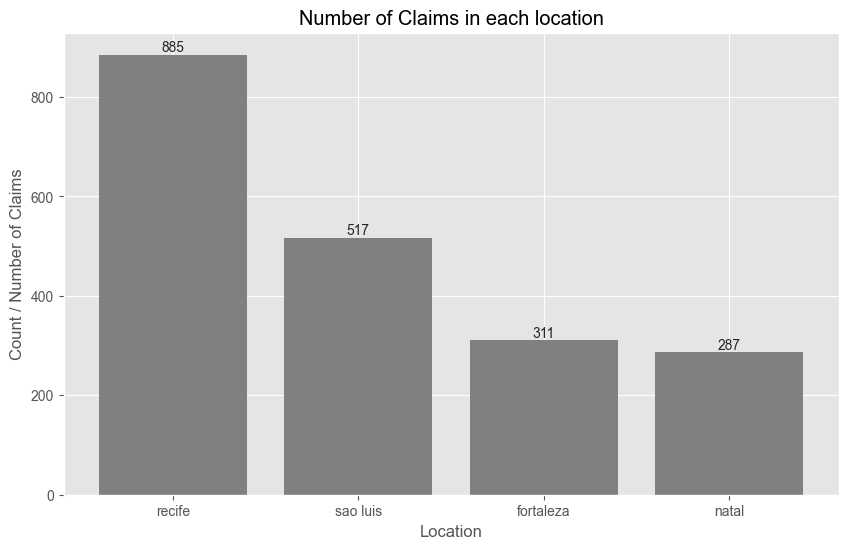

In [46]:
value_counts = df['location'].value_counts()

 # Adjust the figure size 
plt.figure(figsize=(10, 6)) 

# Create the bar chart
plt.bar(value_counts.index, value_counts.values)

# Set the color palette and linestyle for the grid lines
sns.set_palette(['dimgray'])
sns.set_style("whitegrid", {'axes.grid': True, 'grid.linestyle': '-', 'grid.color': '#F0F0F0'})

# Label each bar with their respective numbers
for i, value in enumerate(value_counts.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Customize the chart
plt.xlabel('Location')
plt.ylabel('Count / Number of Claims')
plt.title('Number of Claims in each location')

# Display the chart
plt.show()

# Task 2

Create a visualization that shows the number of claims in each location. Use the visualization to:
- State which category of the variable location has the most observations
- Explain whether the observations are balanced across categories of the variable location



## Solution

There are four categories of location included in this data. The location with the most number of claims is Recife, with Sao Luis being second although with 25% of the number of the overall calim. The categories are unbalanced, with most observations being either Recife or Sao Luis. The legal team should focus on  Recife and Sao Luis as they are the location with most claim. Recife: 42.92%, Sao Luis: 25.07%, Fortaleza: 15.04%, Natal: 13.97%.




# Task 3


Describe the distribution of time to close for all claims. Your answer must include a visualization that shows the distribution.

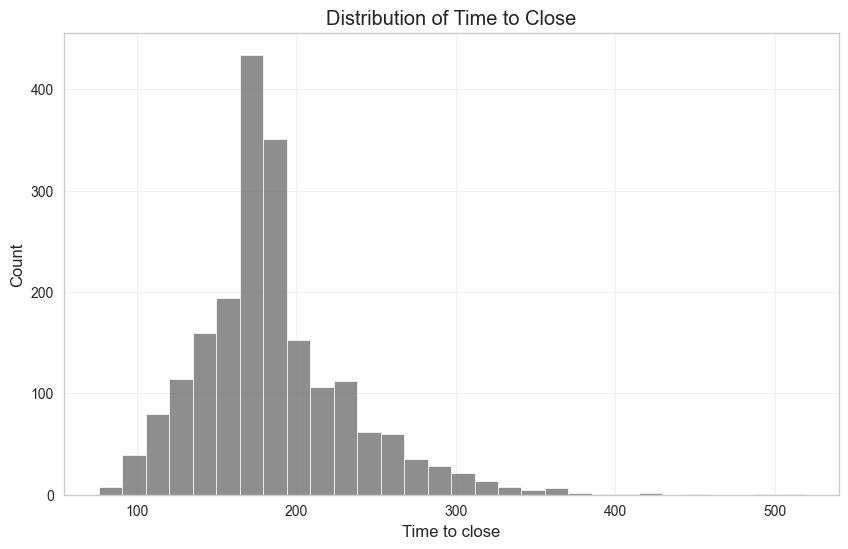

In [47]:
# give the graph a size
plt.figure(figsize=(10, 6))

#Create an histogram with time_to_close
sns.histplot(df['time_to_close'], bins=30)


# Set the color palette and linestyle for the grid lines
sns.set_palette(['dimgray'])
sns.set_style("whitegrid", {'axes.grid': True, 'grid.linestyle': '-', 'grid.color': '#F0F0F0'})

#Customize the chart
plt.ylabel('Count')
plt.xlabel('Time to close')
plt.title('Distribution of Time to Close')

#Display chart
plt.show()

# Task 3


Describe the distribution of time to close for all claims. Your answer must include a visualization that shows the distribution.


## Solution

The graph below exhibits a predominantly symmetrical, with more data clusters around the peak. distribution, indicating a normal distribution pattern. However, when specifically examining the time it takes to close claims, the distribution is right-skews. While outliers exist, indicating rare instances of claims taking over 300 days to close, the majority of claims fall within the range of 173 to 188 days.

Based on this insightful analysis, the legal team is now equipped to establish targeted objectives and performance metrics aimed at enhancing the closure time of claims. By considering the typical timeframe within which the majority of claims are resolved, the team can set realistic goals and develop strategies to streamline and expedite the claims closure process.


## Task 4

Describe the relationship between time to close and location. Your answer must include a visualization to demonstrate the relationship.

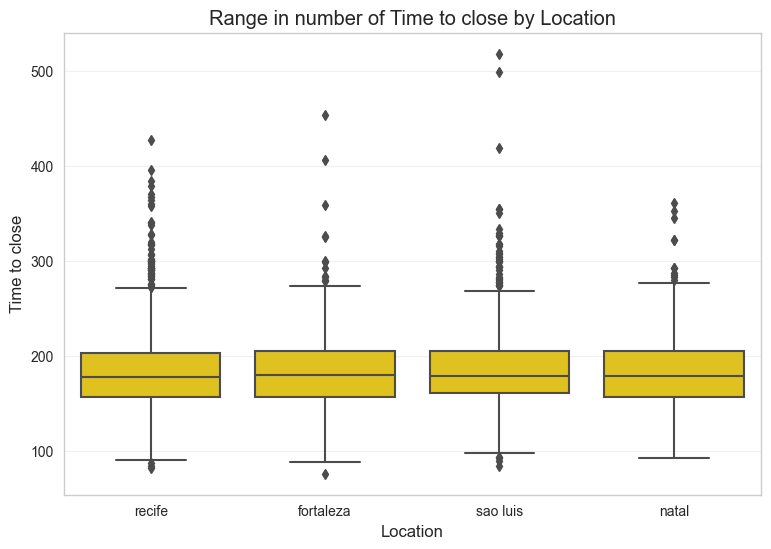

In [48]:
# Adjust the figure size as needed
plt.figure(figsize=(9, 6))  

# Create a box plot to visualize the distribution of 'time_to_close' over 'location'
sns.boxplot(data=df, x='location', y='time_to_close', color='gold')
plt.xlabel('Location')
plt.ylabel('Time to close')
plt.title('Range in number of Time to close by Location')

# Display the plot
plt.show()

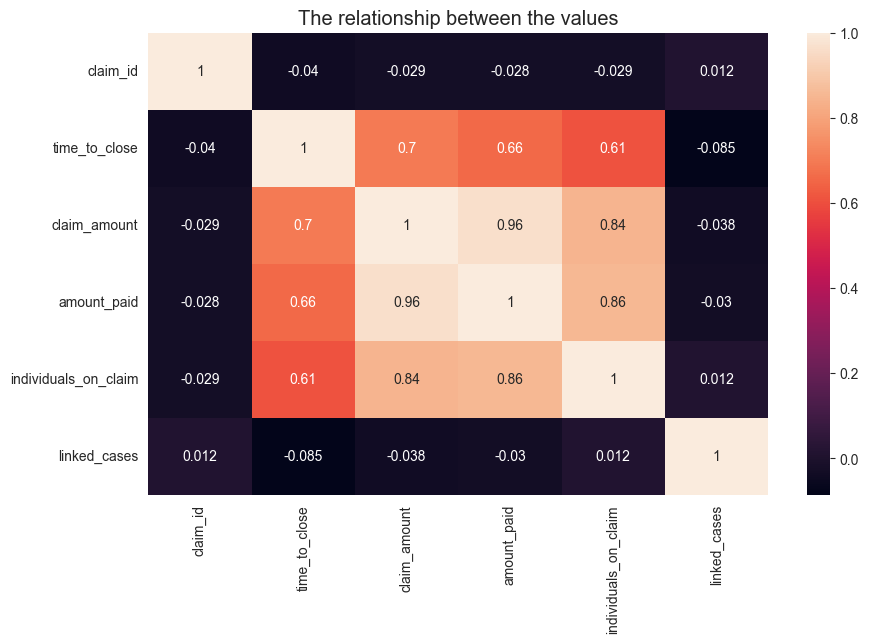

In [49]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True);
plt.title('The relationship between the values');

# Task 4


Describe the relationship between time to close and location. Your answer must include a visualization to demonstrate the relationship.


## Solution

We can examine two variables to explore the impact of office location on claim closure time. This analysis provides valuable insights for the legal team regarding the distribution of observations across different office locations.

From the graph, it is evident that all office locations exhibit similar interquartile ranges. The mean slightly surpasses the median for each location, indicating the presence of outliers. However, both the mean and median values demonstrate consistency, ranging from 178 to 180.

Notably, the Recife office location stands out with the highest number of outliers, representing cases that took more than 300 to 400 days to close. Similarly, Sao Luis exhibits a few cases exceeding 400 days for closure, alongside outlier cases taking over 300 days. Fortaleza and Natal, on the other hand, have a lower number of outliers.




# Recommendation

Given these observations, the legal team can prioritize Recife and Sao Luis office locations when formulating solutions to enhance the claims closure process. Additionally, further investigations can be conducted to determine any potential relationships between variables such as claim amount, individuals involved in the claim, and the duration of the claims closure process.

In [50]:
df.head(10)

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,74474.55,51231.37,recife,15,False,Unknown
1,2,195,52137.83,42111.30,fortaleza,12,True,Unknown
2,3,183,24447.20,23986.30,sao luis,10,True,Meat
3,4,186,29006.28,27942.72,fortaleza,11,False,Meat
4,5,138,19520.60,16251.06,recife,11,False,Vegetable
5,6,183,47529.14,38011.98,natal,11,False,Unknown
6,7,190,39073.26,29826.04,sao luis,12,False,Meat
7,8,183,29870.56,29727.52,sao luis,8,True,Unknown
8,9,149,26644.46,23362.14,recife,9,False,Meat
9,10,149,11544.68,9680.82,natal,6,False,Vegetable
